In [ ]:
pip install -U loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.5 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52019 sha256=2b3c932632ea5f95cb27450e8c6650b9b0b30153b5542329798e1dd807b0d42c
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
Successfully built loompy


In [ ]:
pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 3.9 MB/s eta 0:00:00


In [19]:
pip install anndata numpy matplotlib scipy requests

In [24]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=6ab914001fcf265a4ed3d348527eb35f06520df26c16a9898326b601d5efbb0a
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 59236 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


Extracting UMAP coordinates and cluster IDs...
Plotting data and computing convex hulls...
Saving the figure...
Analysis complete. Figure saved as 'brain_cell_umap_with_hulls.png'


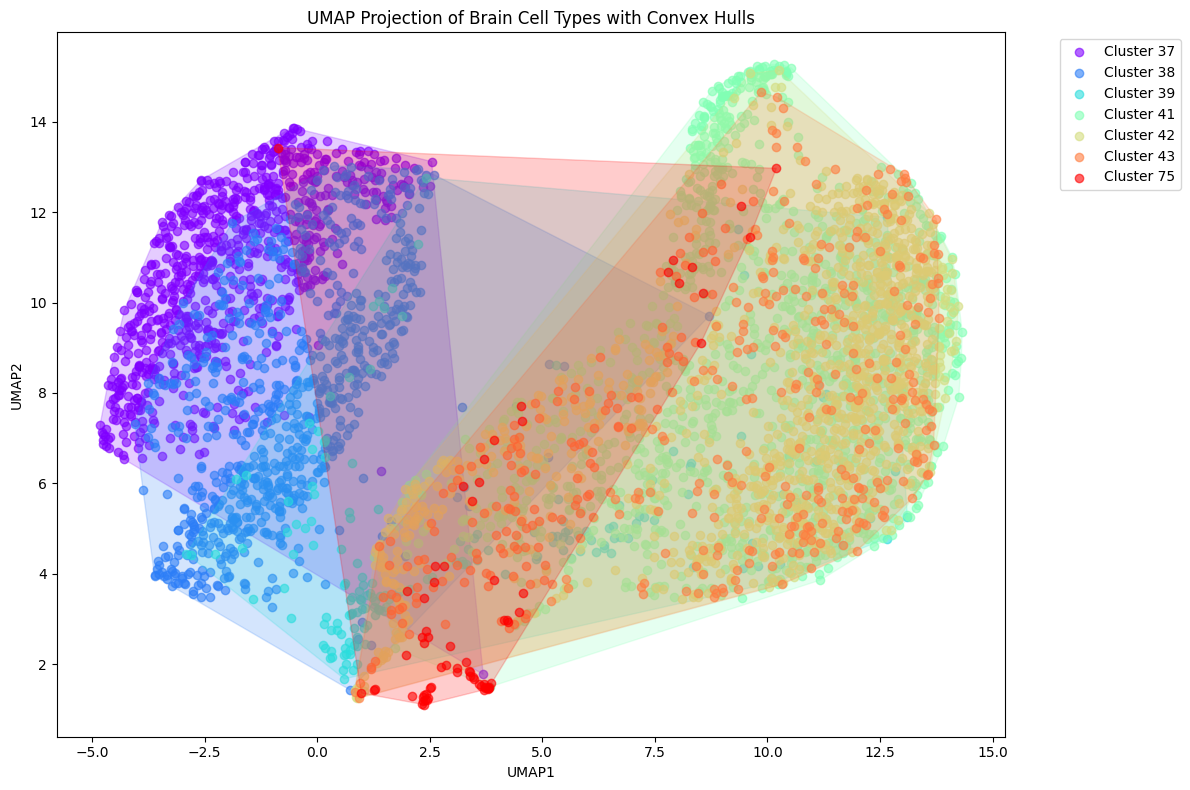

In [26]:
import anndata
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import requests
import io

# Function to download the data
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return io.BytesIO(response.content)
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")

# Function to compute the convex hull
def compute_convex_hull(points):
    hull = ConvexHull(points)
    return points[hull.vertices]

#URL para descargar el dataset de las coordenadas
data_url = "https://datasets.cellxgene.cziscience.com/1c2d14d8-32d4-41be-b38d-ba975ad10efa.h5ad"

# Download and load the data
print("Downloading and loading data...")
data_file = download_data(data_url)
adata = anndata.read_h5ad(data_file)

# Check if 'X_umap' exists in adata.obsm, if not compute it
if 'X_umap' not in adata.obsm.keys():
    # Import scanpy for UMAP computation
    import scanpy as sc
    # Compute neighborhood graph
    sc.pp.neighbors(adata) # Calculate the neighborhood graph
    # Compute UMAP coordinates and store them in adata.obsm
    sc.tl.umap(adata)  # This will store UMAP coordinates in adata.obsm['X_umap']

# Extract UMAP coordinates and cluster_id
print("Extracting UMAP coordinates and cluster IDs...")
umap_coords = adata.obsm['X_umap']
cluster_ids = adata.obs['cluster_id']

# Obtener colores únicos para cada cluster
unique_clusters = np.unique(cluster_ids)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar puntos y calcular hull convexo para cada cluster
print("Plotting data and computing convex hulls...")
for i, cluster in enumerate(unique_clusters):
    cluster_points = umap_coords[cluster_ids == cluster]

    # Graficar puntos
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f'Cluster {cluster}', alpha=0.6)

    # Calcular y graficar hull convexo
    if len(cluster_points) > 2:  # Necesitamos al menos 3 puntos para un hull convexo
        hull_points = compute_convex_hull(cluster_points)
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=colors[i], alpha=0.2)

plt.title('UMAP Projection of Brain Cell Types with Convex Hulls')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Guardar la figura
print("Saving the figure...")
plt.savefig('brain_cell_umap_with_hulls.png', dpi=300, bbox_inches='tight')

print("Analysis complete. Figure saved as 'brain_cell_umap_with_hulls.png'")